In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

filterwarnings("ignore")
%matplotlib inline

In [7]:
df = pd.read_csv('./revenue_forecasting/netflix_revenue_updated.csv')

In [8]:
df.head()

,Date,Global Revenue,UCAN Streaming Revenue,EMEA Streaming Revenue,LATM Streaming Revenue,APAC Streaming Revenue,UCAN Members,EMEA Members,LATM Members,APAC Members,UCAN ARPU,EMEA ARPU,LATM ARPU,APAC ARPU,Netflix Streaming Memberships
0,31-03-2019,4520992000,2256851000,1233379000,630472000,319602000,66633000,42542000,27547000,12141000,11.45,10.23,7.84,9.37,148863000
1,30-06-2019,4923116000,2501199000,1319087000,677136000,349494000,66501000,44229000,27890000,12942000,12.52,10.13,8.14,9.29,151562000
2,30-09-2019,5244905000,2621250000,1428040000,741434000,382304000,67114000,47355000,29380000,14485000,13.08,10.40,8.63,9.29,158334000
3,31-12-2019,5467434000,2671908000,1562561000,746392000,418121000,67662000,51778000,31417000,16233000,13.22,10.51,8.18,9.07,167090000
4,31-03-2020,5767691000,2702776000,1723474000,793453000,483660000,69969000,58734000,34318000,19835000,13.09,10.40,8.05,8.94,182856000


In [27]:
df.columns


Index(['Date', 'Global Revenue', 'UCAN Streaming Revenue',
       'EMEA Streaming Revenue', 'LATM Streaming Revenue',
       'APAC Streaming Revenue', 'UCAN Members', 'EMEA  Members',
       'LATM Members', 'APAC Members', 'UCAN ARPU', 'EMEA ARPU', 'LATM  ARPU',
       'APAC  ARPU', 'Netflix Streaming Memberships ', 'Year'],
      dtype='object')

In [28]:
df.rename(columns={'Netflix Streaming Memberships ': 'Netflix Streaming Memberships'}, inplace=True)


The columns in the dataset include:

* Date: The date corresponding to the metrics recorded.
* Global Revenue: The total revenue generated by Netflix globally.
* UACN Revenue: The revenue generated by Netflix from the UACN region.
* EMEA Revenue: The revenue generated by Netflix from the EMEA (Europe, Middle East, and Africa) region.
* LATM Revenue: The revenue generated by Netflix from the LATM (Latin America) region.
* APAC Revenue: The revenue generated by Netflix from the APAC (Asia-Pacific) region.
* UACN Members: The number of Netflix members in the UACN region.
* EMEA Members: The number of Netflix members in the EMEA region.
* LATM Members: The number of Netflix members in the LATM region.
* APAC Members: The number of Netflix members in the APAC region.
* EMEA RPU: Revenue per user (RPU) in the EMEA region.
* LATM RPU: Revenue per user (RPU) in the LATM region.
* APAC RPU: Revenue per user (RPU) in the APAC region.
* Domestic Members: The number of Netflix members in the domestic market.
* Domestic Revenue: The revenue generated by Netflix in the domestic market.
* International Members: The number of Netflix members in the international market.
* International Revenue: The revenue generated by Netflix in the international market.
* Domestic Free Trialers: The number of Netflix free trial users in the domestic market.
* International Free Trialers: The number of Netflix free trial users in the international market.
* Netflix Global Users: The total number of Netflix users worldwide.

The businness model of netflix came from the users that use the app. In this order we want to achive the revenue in terms of members using the app, they have a supscription or not for example that could be another variable (1, 0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            17 non-null     object 
 1   Global Revenue                  17 non-null     int64  
 2   UCAN Streaming Revenue          17 non-null     int64  
 3   EMEA Streaming Revenue          17 non-null     int64  
 4   LATM Streaming Revenue          17 non-null     int64  
 5   APAC Streaming Revenue          17 non-null     int64  
 6   UCAN Members                    17 non-null     int64  
 7   EMEA  Members                   17 non-null     int64  
 8   LATM Members                    17 non-null     int64  
 9   APAC Members                    17 non-null     int64  
 10  UCAN ARPU                       17 non-null     float64
 11  EMEA ARPU                       17 non-null     float64
 12  LATM  ARPU                      17 non

In [15]:
df.shape

(17, 15)

In [16]:
df.isnull().sum()

Date                              0
Global Revenue                    0
UCAN Streaming Revenue            0
EMEA Streaming Revenue            0
LATM Streaming Revenue            0
APAC Streaming Revenue            0
UCAN Members                      0
EMEA  Members                     0
LATM Members                      0
APAC Members                      0
UCAN ARPU                         0
EMEA ARPU                         0
LATM  ARPU                        0
APAC  ARPU                        0
Netflix Streaming Memberships     0
dtype: int64

In [14]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
dtype: bool

In [18]:
df.describe()

,Global Revenue,UCAN Streaming Revenue,EMEA Streaming Revenue,LATM Streaming Revenue,APAC Streaming Revenue,UCAN Members,EMEA Members,LATM Members,APAC Members,UCAN ARPU,EMEA ARPU,LATM ARPU,APAC ARPU,Netflix Streaming Memberships
count,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,17.000000,17.000000,17.000000,17.000000,1.700000e+01
mean,6.742788e+09,3.068941e+09,2.075164e+09,8.629001e+08,6.830686e+08,7.207747e+07,6.418447e+07,3.635882e+07,2.628129e+07,14.200588,10.910000,8.004706,9.050000,1.989021e+08
std,1.197879e+09,4.209004e+08,4.594011e+08,1.349618e+08,2.204141e+08,3.129072e+06,1.149417e+07,4.624148e+06,8.939004e+06,1.432919,0.544059,0.508123,0.562361,2.780993e+07
min,4.520992e+09,2.256851e+09,1.233379e+09,6.304720e+08,3.196020e+08,6.650100e+07,4.254200e+07,2.754700e+07,1.214100e+07,11.450000,10.130000,7.120000,7.690000,1.488630e+08
25%,5.767691e+09,2.702776e+09,1.723474e+09,7.853680e+08,4.836600e+08,6.996900e+07,5.873400e+07,3.431800e+07,1.983500e+07,13.220000,10.430000,7.500000,8.940000,1.828560e+08
50%,7.163282e+09,3.170972e+09,2.343674e+09,8.366470e+08,7.624140e+08,7.338700e+07,6.850800e+07,3.789400e+07,2.685300e+07,14.250000,10.880000,8.140000,9.210000,2.076390e+08
75%,7.852053e+09,3.350424e+09,2.432239e+09,9.989480e+08,8.707050e+08,7.429600e+07,7.353400e+07,3.962400e+07,3.371900e+07,14.910000,11.560000,8.370000,9.320000,2.216410e+08
max,8.161503e+09,3.608645e+09,2.561831e+09,1.070192e+09,9.335230e+08,7.521500e+07,7.737300e+07,4.169900e+07,3.947800e+07,16.370000,11.660000,8.670000,9.740000,2.324980e+08


In [24]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = pd.to_datetime(df['Date']).dt.year

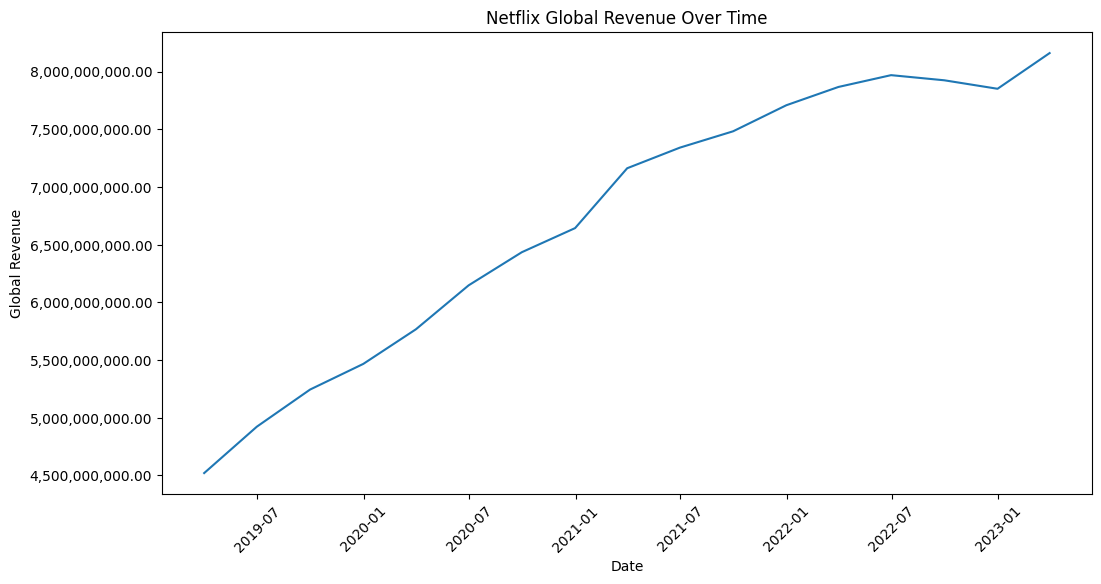

In [20]:
# Sort the dataframe by date
df = df.sort_values('Date')

# Plot the revenue trends over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Global Revenue'])
plt.title('Netflix Global Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Global Revenue')
plt.xticks(rotation=45)

# Modify the y-axis tick labels
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.2f}".format(x)))

plt.show()

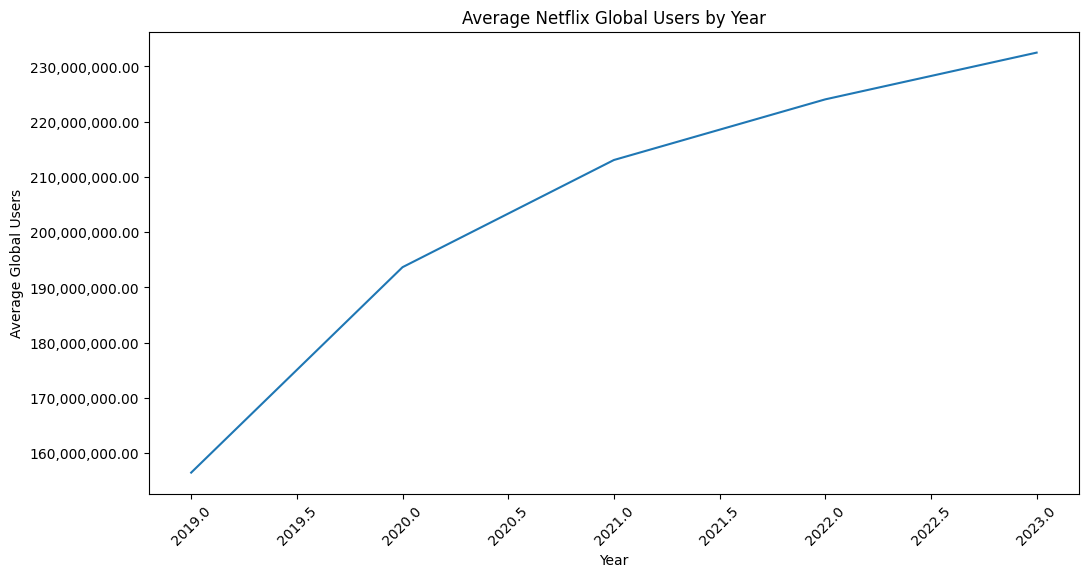

In [29]:
# Group the data by year and calculate the average global users
average_users = df.groupby('Year')['Netflix Streaming Memberships'].mean()

# Plot the average global users over time
plt.figure(figsize=(12, 6))
plt.plot(average_users.index, average_users.values)
plt.title('Average Netflix Global Users by Year')
plt.xlabel('Year')
plt.ylabel('Average Global Users')
plt.xticks(rotation=45)

# Modify the y-axis tick labels
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.2f}".format(x)))

plt.show()

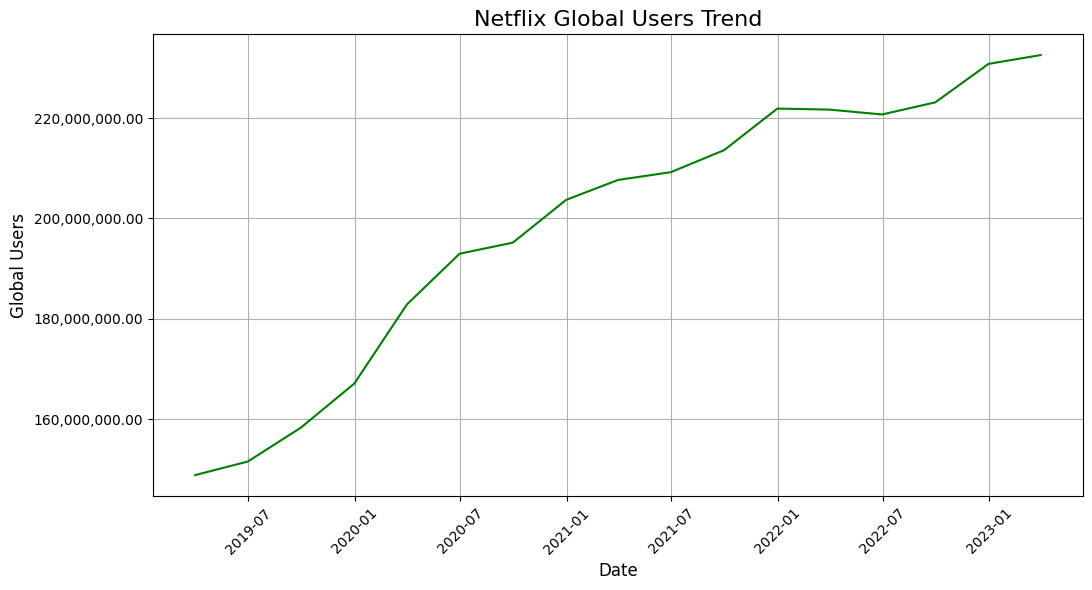

In [31]:
# Plot the global users trend over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Netflix Streaming Memberships'], color='green')
plt.title('Netflix Global Users Trend', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Global Users', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Modify the y-axis tick labels
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.2f}".format(x)))

plt.show()

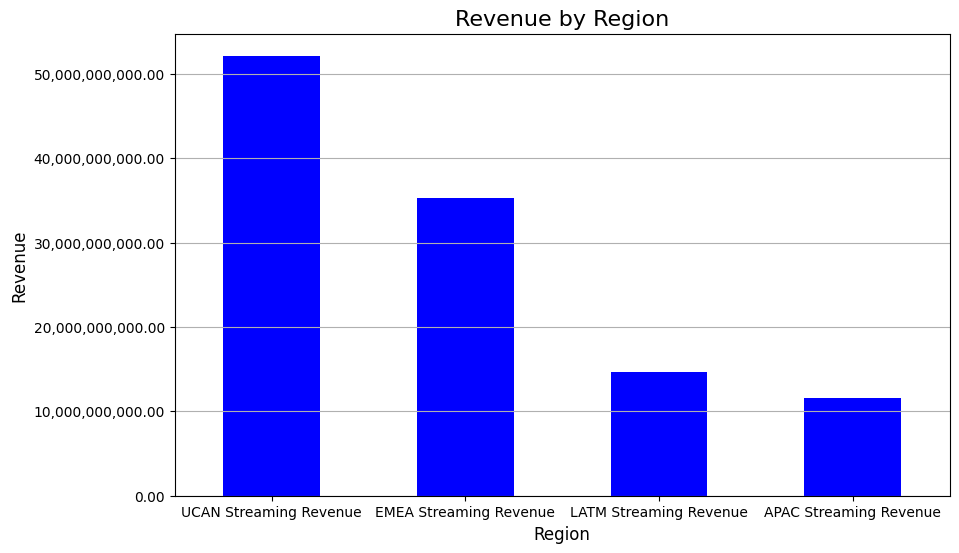

In [35]:
# Calculate the sum of revenue by region
revenue_by_region = df[['UCAN Streaming Revenue', 'EMEA Streaming Revenue', 'LATM Streaming Revenue', 'APAC Streaming Revenue']].sum()

# Plot the bar chart of revenue by region
plt.figure(figsize=(10, 6))
revenue_by_region.plot(kind='bar', color='blue')
plt.title('Revenue by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y')

# Modify the y-axis tick labels
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.2f}".format(x)))

plt.show()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

Entrenar modelo

In [38]:
predictors = ['UCAN Streaming Revenue', 'EMEA Streaming Revenue', 'LATM Streaming Revenue', 'APAC Streaming Revenue', 
              'UCAN Members', 'EMEA  Members', 'LATM Members', 'APAC Members']
target = 'Global Revenue'

# Dividir los datos en conjunto de entrenamiento y prueba
X = df[predictors]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)

# Predecir y evaluar el modelo
y_pred = svr_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(3.8728878426931666e+18, -1.3045794327730502)